# Pandas Crash Course

<img style="float: right; border:3px solid black" src="images/10_Panda_DailyMail_7_Nov_2013.jpg" border="5" width=30%>

Pandas is a Python package that aims to make working with data as easy and intuitive as possible. It fills the role of a foundational real world data manipulation library and interfaces with many other Python packages.

By the end of this file you should have seen simple examples of:

1. Pandas Series and DataFrame objects
1. Data IO
1. Data types
1. Indexing and setting data
1. Dealing with missing data
1. Concatinating and merging data
1. Grouping Operations
1. Operations on Pandas data objects
1. Applying any function to Pandas data objects
1. Plotting

Further Reading:  
http://pandas.pydata.org/pandas-docs/stable/10min.html  
https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join  


Image Credit: David Jenkins at Bifengxia Panda Reserve in Chengdu

In [1]:
# Python imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Pandas Series and DataFrame objects

There are two main data structures in pandas:
-  Series (1 dimensional data)
-  Dataframes (2 dimensional data)
-  There are other, lesser used data structures used for higher dimensional data, but are less frequently used
    - Panel (3 dimensional data) - panel will be removed from future versions of Pandas and replaced with xarray
    -  Xarray (>2 dimensions)

Here, the 1- and 2-dimensional data sets are the focus of this lesson.

Pandas DataFrames are analogus to R's data.frame, but aim to provide additional functionality. 


Both dataframes and series data structures have indicies, which are shown on the left:

In [2]:
series1 = pd.Series([1,2,3,4])
print(series1)

0    1
1    2
2    3
3    4
dtype: int64


Dataframes use the IPython display method to look pretty, but will show just fine when printed also. (There's a way to make all of the dataframes print pretty via the IPython.display.display method, but this isn't necessary to view the values):

In [3]:
df1 = pd.DataFrame([[1,2,3,4],[10,20,30,40]])
print(df1)
df1

    0   1   2   3
0   1   2   3   4
1  10  20  30  40


,0,1,2,3
0,1,2,3,4
1,10,20,30,40


Indices can be named:

In [4]:
# Rename the columns
df1.columns = ['A','B','C','D']
df1.index = ['zero','one']
df1

,A,B,C,D
zero,1,2,3,4
one,10,20,30,40


In [5]:
# Create the dataframe with the columns
df1 = pd.DataFrame([[1,2,3,4],[10,20,30,40]], columns=['A','B','C',"D"], index=['zero','one'])
df1

,A,B,C,D
zero,1,2,3,4
one,10,20,30,40


## Data Input Output

In [6]:
df1 = pd.DataFrame(np.random.randn(5,4), columns = ['A','B','C','D'], index=['zero','one','two','three','four'])
print(df1)

              A         B         C         D
zero  -0.373621 -0.247423 -0.040302  0.033477
one   -0.424199 -0.417990 -1.301303  0.908326
two   -0.448194 -0.470595  1.020852 -0.576712
three  1.321021 -1.004106  0.956355 -0.185157
four   0.732942  2.053800 -1.436492  0.348923


### CSV Files

In [7]:
df1.to_csv('datafiles/pandas_df1.csv')
!ls datafiles

01-data_write.hdf5	 01-simplemat.mat	  pandas_df1.csv
01-simpledata.csv	 01-simplemat_write.mat   pandas_df1.h5
01-simpledata_write.bin  01-simpletext.txt	  presentation.mplstyle
01-simpledata_write.csv  01-simpletext_write.txt


In [8]:
df2 = pd.read_csv('datafiles/pandas_df1.csv', index_col=0)
print(df2)

              A         B         C         D
zero  -0.373621 -0.247423 -0.040302  0.033477
one   -0.424199 -0.417990 -1.301303  0.908326
two   -0.448194 -0.470595  1.020852 -0.576712
three  1.321021 -1.004106  0.956355 -0.185157
four   0.732942  2.053800 -1.436492  0.348923


### hdf5 files

In [9]:
df1.to_hdf('datafiles/pandas_df1.h5', 'df')
!ls datafiles

01-data_write.hdf5	 01-simplemat.mat	  pandas_df1.csv
01-simpledata.csv	 01-simplemat_write.mat   pandas_df1.h5
01-simpledata_write.bin  01-simpletext.txt	  presentation.mplstyle
01-simpledata_write.csv  01-simpletext_write.txt


In [10]:
df2 = pd.read_hdf('datafiles/pandas_df1.h5', 'df')
print(df2)

              A         B         C         D
zero  -0.373621 -0.247423 -0.040302  0.033477
one   -0.424199 -0.417990 -1.301303  0.908326
two   -0.448194 -0.470595  1.020852 -0.576712
three  1.321021 -1.004106  0.956355 -0.185157
four   0.732942  2.053800 -1.436492  0.348923


## Data types

Show the datatypes of each column:

In [11]:
df2.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

We can create dataframes of multiple datatypes:

In [12]:
col1 = range(6)
col2 = np.random.rand(6)
col3 = ['zero','one','two','three','four','five']
col4 = ['blue', 'cow','blue', 'cow','blue', 'cow']

df_types = pd.DataFrame( {'integers': col1, 'floats': col2, 'words': col3, 'cow color': col4} )
print(df_types)

   integers    floats  words cow color
0         0  0.382051   zero      blue
1         1  0.335466    one       cow
2         2  0.565723    two      blue
3         3  0.510923  three       cow
4         4  0.750806   four      blue
5         5  0.693244   five       cow


In [13]:
df_types.dtypes

integers       int64
floats       float64
words         object
cow color     object
dtype: object

We can also set the 'cow color' column to a category:

In [14]:
df_types['cow color'] = df_types['cow color'].astype("category")
df_types.dtypes

integers        int64
floats        float64
words          object
cow color    category
dtype: object

## Indexing and Setting Data

Pandas does a *lot* of different operations, here are the meat and potatoes. The following describes the indexing of data, but setting the data is as simple as a reassignment.

In [15]:
time_stamps = pd.date_range(start='2000-01-01', end='2000-01-20', freq='D') # Define index of time stamps
df1 = pd.DataFrame(np.random.randn(20,4), columns = ['A','B','C','D'], index=time_stamps)
print(df1)

                   A         B         C         D
2000-01-01 -2.148320 -0.333352 -1.955087 -0.031653
2000-01-02 -0.363028 -0.735354 -1.003570  2.917665
2000-01-03 -0.070073 -1.502237  0.357330  0.293532
2000-01-04 -0.658409 -0.519531  0.372368 -0.082892
2000-01-05 -0.347255 -1.877360  1.798925 -1.196501
2000-01-06  0.910050 -1.860890  0.950236  1.729865
2000-01-07  0.274789 -1.605664 -0.550596  0.409954
2000-01-08 -1.692789 -0.353392  0.088221 -0.483079
2000-01-09  0.354391  0.950867 -0.641271  1.498960
2000-01-10  0.416353  0.307605  0.098817 -1.084056
2000-01-11  2.144184 -0.885058  2.406441  0.060464
2000-01-12 -0.314988  1.611354 -0.120403 -0.712474
2000-01-13 -1.149183  0.154171 -0.350990 -0.598516
2000-01-14 -1.522168 -0.481107 -0.472934 -0.844703
2000-01-15  0.867458  0.351842  1.367980 -0.729122
2000-01-16 -1.172752  0.513646  1.562067  0.769301
2000-01-17 -0.607056 -0.455895 -0.544137 -0.360197
2000-01-18 -0.706161 -2.056215  0.109552  0.662488
2000-01-19  1.731916  0.340571 

### Head and Tail 
Print the beginning and ending entries of a pandas data structure

In [16]:
df1.head(3) # Show the first n rows, default is 5

,A,B,C,D
2000-01-01,-2.148320,-0.333352,-1.955087,-0.031653
2000-01-02,-0.363028,-0.735354,-1.003570,2.917665
2000-01-03,-0.070073,-1.502237,0.357330,0.293532


In [17]:
df1.tail() # Show the last n rows

,A,B,C,D
2000-01-16,-1.172752,0.513646,1.562067,0.769301
2000-01-17,-0.607056,-0.455895,-0.544137,-0.360197
2000-01-18,-0.706161,-2.056215,0.109552,0.662488
2000-01-19,1.731916,0.340571,0.170681,-2.129683
2000-01-20,-0.012410,0.357174,-0.095124,-0.010638


We can also separate the metadata (labels, etc) from the data, yielding a numpy-like output.

In [18]:
df1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df1.values

array([[-2.14831999, -0.33335168, -1.95508675, -0.03165296],
       [-0.36302813, -0.73535377, -1.00356972,  2.91766536],
       [-0.07007254, -1.50223733,  0.35733033,  0.29353206],
       [-0.65840882, -0.51953117,  0.37236751, -0.08289185],
       [-0.34725534, -1.87736029,  1.79892542, -1.19650108],
       [ 0.91005021, -1.86088976,  0.95023554,  1.72986496],
       [ 0.27478925, -1.6056642 , -0.55059557,  0.40995444],
       [-1.69278881, -0.35339229,  0.08822057, -0.48307916],
       [ 0.35439114,  0.95086747, -0.64127136,  1.49895955],
       [ 0.4163533 ,  0.30760466,  0.09881654, -1.08405576],
       [ 2.14418362, -0.88505806,  2.4064408 ,  0.06046355],
       [-0.31498774,  1.61135355, -0.12040329, -0.71247387],
       [-1.14918337,  0.15417072, -0.35099001, -0.59851609],
       [-1.52216771, -0.48110717, -0.47293441, -0.84470281],
       [ 0.86745843,  0.35184244,  1.36798007, -0.72912218],
       [-1.17275153,  0.51364599,  1.56206715,  0.76930138],
       [-0.60705602, -0.

### Indexing Data

Pandas provides the means to index data via named columns, or as numpy like indices. Indexing is [row, column], just as it was in numpy.

Data is visible via column:

In [20]:
df1['A'].head() # df1.A.head() is equivalent

2000-01-01   -2.148320
2000-01-02   -0.363028
2000-01-03   -0.070073
2000-01-04   -0.658409
2000-01-05   -0.347255
Freq: D, Name: A, dtype: float64

Note that tab completion is enabled for column names:

In [21]:
df1.A

2000-01-01   -2.148320
2000-01-02   -0.363028
2000-01-03   -0.070073
2000-01-04   -0.658409
2000-01-05   -0.347255
2000-01-06    0.910050
2000-01-07    0.274789
2000-01-08   -1.692789
2000-01-09    0.354391
2000-01-10    0.416353
2000-01-11    2.144184
2000-01-12   -0.314988
2000-01-13   -1.149183
2000-01-14   -1.522168
2000-01-15    0.867458
2000-01-16   -1.172752
2000-01-17   -0.607056
2000-01-18   -0.706161
2000-01-19    1.731916
2000-01-20   -0.012410
Freq: D, Name: A, dtype: float64

<div>
<img style="float: left;" src="images/10-01_column-tab.png" width=30%>
</div>

We can specify row ranges:

In [22]:
df1[:2]

,A,B,C,D
2000-01-01,-2.148320,-0.333352,-1.955087,-0.031653
2000-01-02,-0.363028,-0.735354,-1.003570,2.917665


#### Label based indexing (.loc)

Slice based on the labels.

In [23]:
df1.loc[:'2000-01-5',"A"] # Note that this includes the upper index

2000-01-01   -2.148320
2000-01-02   -0.363028
2000-01-03   -0.070073
2000-01-04   -0.658409
2000-01-05   -0.347255
Freq: D, Name: A, dtype: float64

#### Integer based indexing (.iloc)

Slice based on the index number.

In [24]:
df1.iloc[:3,0] # Note that this does not include the upper index like numpy

2000-01-01   -2.148320
2000-01-02   -0.363028
2000-01-03   -0.070073
Freq: D, Name: A, dtype: float64

#### Fast single element label indexing (.at) - fast .loc
Intended for fast, single indexes.

In [25]:
index_timestamp = pd.Timestamp('2000-01-03') # Create a timestamp object to index
df1.at[index_timestamp,"A"]  # Index using timestamp (vs string)

-0.0700725424102197

#### Fast single element label indexing (.iat) - fast .iloc
Intended for fast, single indexes.

In [26]:
df1.iat[3,0]

-0.6584088247780195

### Logical indexing

A condition is used to select the values within a slice or the entire Pandas object. Using a conditional statement, a true/false DataFrame is produced:

In [27]:
df1.head()>0.5

,A,B,C,D
2000-01-01,False,False,False,False
2000-01-02,False,False,False,True
2000-01-03,False,False,False,False
2000-01-04,False,False,False,False
2000-01-05,False,False,True,False


That matrix can then be used to index the DataFrame:

In [28]:
df1[df1>0.5].head() # Note that the values that were 'False' are 'NaN'

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,2.917665
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,1.798925,NaN


#### Logical indexing via `isin`
It's also possible to filter via the index value:

In [29]:
df_types

,integers,floats,words,cow color
0,0,0.382051,zero,blue
1,1,0.335466,one,cow
2,2,0.565723,two,blue
3,3,0.510923,three,cow
4,4,0.750806,four,blue
5,5,0.693244,five,cow


In [30]:
bool_series = df_types['cow color'].isin(['blue'])
print(bool_series) # Show the logical indexing

df_types[bool_series] # Index where the values are true

0     True
1    False
2     True
3    False
4     True
5    False
Name: cow color, dtype: bool


,integers,floats,words,cow color
0,0,0.382051,zero,blue
2,2,0.565723,two,blue
4,4,0.750806,four,blue


### Sorting by column

In [31]:
df_types.sort_values(by="floats")

,integers,floats,words,cow color
1,1,0.335466,one,cow
0,0,0.382051,zero,blue
3,3,0.510923,three,cow
2,2,0.565723,two,blue
5,5,0.693244,five,cow
4,4,0.750806,four,blue


## Dealing with Missing Data

By convention, pandas uses the `NaN` value to represent missing data. There are a few functions surrounding the handling of `NaN` values:

In [32]:
df_nan = pd.DataFrame(np.random.rand(6,2), columns = ['A','B'])
df_nan

,A,B
0,0.647968,0.841172
1,0.224838,0.053534
2,0.989680,0.496426
3,0.125777,0.267513
4,0.947133,0.687054
5,0.962330,0.705046


In [33]:
df_nan['B'] = df_nan[df_nan['B']>0.5] # Prints NaN Where ['B'] <= 0.5
print(df_nan)

          A         B
0  0.647968  0.647968
1  0.224838       NaN
2  0.989680       NaN
3  0.125777       NaN
4  0.947133  0.947133
5  0.962330  0.962330


Print a logical DataFrame where `NaN` is located:

In [34]:
df_nan.isnull()

,A,B
0,False,False
1,False,True
2,False,True
3,False,True
4,False,False
5,False,False


Drop all rows with `NaN`:

In [35]:
df_nan.dropna(how = 'any')

,A,B
0,0.647968,0.647968
4,0.947133,0.947133
5,0.962330,0.962330


Replace `NaN` entries:

In [36]:
df_nan.fillna(value = -1)

,A,B
0,0.647968,0.647968
1,0.224838,-1.000000
2,0.989680,-1.000000
3,0.125777,-1.000000
4,0.947133,0.947133
5,0.962330,0.962330


## Concatenating and Merging Data

Bringing together DataFrames or Series objects:

#### Concatenate

In [37]:
df1 = pd.DataFrame(np.zeros([3,3], dtype=np.int))
df1

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0


In [38]:
df2 = pd.concat([df1, df1], axis=0)
df2 = df2.reset_index(drop=True) # Renumber indexing
df2

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


#### Append

Adding an additional group after the first group:

In [39]:
newdf = pd.DataFrame({0: [1], 1:[1], 2:[1]})
print(newdf)
df3 = df2.append(newdf, ignore_index=True)
df3

   0  1  2
0  1  1  1


,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,1,1,1


### SQL-like merging

Pandas can do structured query language (SQL) like merges of data:

In [40]:
left = pd.DataFrame({'numbers': ['K0', 'K1', 'K2', 'K3'],
    'English': ['one', 'two', 'three', 'four'],
    'Spanish': ['uno', 'dos', 'tres', 'quatro'],
    'German': ['erste', 'zweite','dritte','vierte']})
left

,numbers,English,Spanish,German
0,K0,one,uno,erste
1,K1,two,dos,zweite
2,K2,three,tres,dritte
3,K3,four,quatro,vierte


In [41]:
right = pd.DataFrame({'numbers': ['K0', 'K1', 'K2', 'K3'],
    'French': ['un', 'deux', 'trois', 'quatre'],
    'Afrikaans': ['een', 'twee', 'drie', 'vier']})
right

,numbers,French,Afrikaans
0,K0,un,een
1,K1,deux,twee
2,K2,trois,drie
3,K3,quatre,vier


In [42]:
result = pd.merge(left, right, on='numbers')
result

,numbers,English,Spanish,German,French,Afrikaans
0,K0,one,uno,erste,un,een
1,K1,two,dos,zweite,deux,twee
2,K2,three,tres,dritte,trois,drie
3,K3,four,quatro,vierte,quatre,vier


## Grouping Operations

Often, there is a need to summarize the data or change the output of the data to make it easier to work with, especially for categorical data types.

In [43]:
dfg = pd.DataFrame({'A': ['clogs','sandals','jellies']*2,
                    'B': ['socks','footies']*3,
                    'C': [1,1,1,3,2,2],
                    'D': np.random.rand(6)})
dfg

,A,B,C,D
0,clogs,socks,1,0.099364
1,sandals,footies,1,0.224896
2,jellies,socks,1,0.271323
3,clogs,footies,3,0.916887
4,sandals,socks,2,0.134264
5,jellies,footies,2,0.258837


#### Pivot Table

Without changing the data in any way, summarize the output in a different format. Specify the indicies, columns, and values:

In [44]:
dfg.pivot_table(index=['A','B'], columns=['C'], values='D')

C                       1         2         3
A       B                                    
clogs   footies       NaN       NaN  0.916887
        socks    0.099364       NaN       NaN
jellies footies       NaN  0.258837       NaN
        socks    0.271323       NaN       NaN
sandals footies  0.224896       NaN       NaN
        socks         NaN  0.134264       NaN

#### Stacking

Column labels can be brought into the rows.

In [45]:
dfg.stack()

0  A        clogs
   B        socks
   C            1
   D    0.0993637
1  A      sandals
   B      footies
   C            1
   D     0.224896
2  A      jellies
   B        socks
   C            1
   D     0.271323
3  A        clogs
   B      footies
   C            3
   D     0.916887
4  A      sandals
   B        socks
   C            2
   D     0.134264
5  A      jellies
   B      footies
   C            2
   D     0.258837
dtype: object

#### Groupby

Groupby groups values, creating a Python object to which functions can be applied:

In [46]:
dfg.groupby(['B']).count()

,A,C,D
B,,,
footies,3,3,3
socks,3,3,3


In [47]:
dfg.groupby(['A']).mean()

,C,D
A,,
clogs,2.0,0.508125
jellies,1.5,0.265080
sandals,1.5,0.179580


## Operations on Pandas Data Objects

Wether it's the entire data frame or a series within a single dataframe, there are a variety of methods that can be applied. Here's a list of a few helpful ones:

#### Simple statistics (mean, stdev, etc).

In [48]:
dfg['D'].mean()

0.3175951646617483

#### Rotation 
Note that the values rotated out leave `NaN` behind:

In [49]:
dfg['D']

0    0.099364
1    0.224896
2    0.271323
3    0.916887
4    0.134264
5    0.258837
Name: D, dtype: float64

In [50]:
dfg_Ds = dfg['D'].shift(2)
dfg_Ds 

0         NaN
1         NaN
2    0.099364
3    0.224896
4    0.271323
5    0.916887
Name: D, dtype: float64

#### Add, subtract, multiply, divide:

Operations are element-wise:

In [51]:
dfg['D'].div(dfg_Ds )


0         NaN
1         NaN
2    2.730607
3    4.076937
4    0.494847
5    0.282300
Name: D, dtype: float64

#### Histogram

In [52]:
dfg

,A,B,C,D
0,clogs,socks,1,0.099364
1,sandals,footies,1,0.224896
2,jellies,socks,1,0.271323
3,clogs,footies,3,0.916887
4,sandals,socks,2,0.134264
5,jellies,footies,2,0.258837


In [53]:
dfg['C'].value_counts()

1    3
2    2
3    1
Name: C, dtype: int64

#### Describe 
Excluding NaN values, print some descriptive statistics about the collection of values.

In [54]:
df_types.describe()

,integers,floats
count,6.000000,6.000000
mean,2.500000,0.539702
std,1.870829,0.165052
min,0.000000,0.335466
25%,1.250000,0.414269
50%,2.500000,0.538323
75%,3.750000,0.661364
max,5.000000,0.750806


#### Transpose

Exchange the rows and columns (flip about the diagonal):

In [55]:
df_types.T

,0,1,2,3,4,5
integers,0,1,2,3,4,5
floats,0.382051,0.335466,0.565723,0.510923,0.750806,0.693244
words,zero,one,two,three,four,five
cow color,blue,cow,blue,cow,blue,cow


## Applying Any Function to Pandas Data Objects

Pandas objects have methods that allow function to be applied with greater control, namely the `.apply` function:

In [56]:
def f(x): # Define function
    return x + 1

dfg['C'].apply(f)

0    2
1    2
2    2
3    4
4    3
5    3
Name: C, dtype: int64

Lambda functions may also be used

In [57]:
dfg['C'].apply(lambda x: x + 1)

0    2
1    2
2    2
3    4
4    3
5    3
Name: C, dtype: int64

#### String functions:

Pandas has access to string methods:

In [58]:
dfg['A'].str.title() # Make the first letter uppercase

0      Clogs
1    Sandals
2    Jellies
3      Clogs
4    Sandals
5    Jellies
Name: A, dtype: object

## Plotting

Pandas exposes the matplotlib library for use. 

In [59]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

dfp = pd.DataFrame({'X' : X, 'Y1': Y1, 'Y2': Y2})
dfp.head()

,X,Y1,Y2
0,0.000000,0.693147,2.000000
1,0.050505,0.694422,2.050484
2,0.101010,0.698236,2.100838
3,0.151515,0.704560,2.150936
4,0.202020,0.713348,2.200649


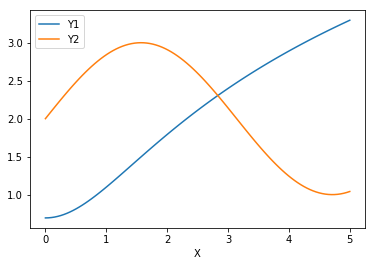

In [60]:
dfp.plot(x = 'X')
plt.show() 

Matplotlib styles are available too:

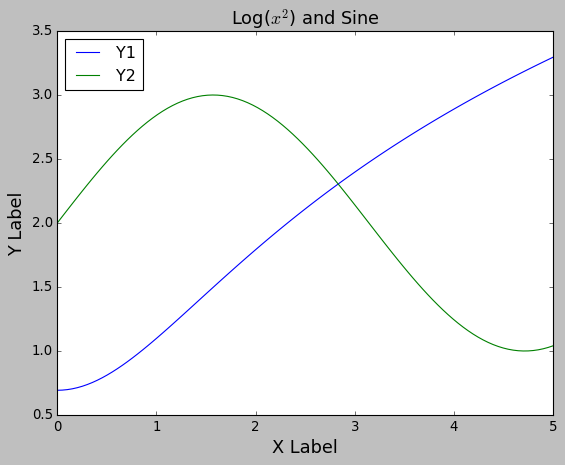

In [61]:
style_name = 'classic'
plt.style.use(style_name)

dfp.plot(x = 'X')
plt.title('Log($x^2$) and Sine', fontsize=16)
plt.xlabel('X Label', fontsize=16)
plt.ylabel('Y Label', fontsize=16)

plt.show() 

In [62]:
mpl.rcdefaults() # Reset matplotlib rc defaults